In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib

In [8]:
# Load cleaned dataset
df = pd.read_csv("../data/cleaned_cancer_data.csv")

# Load DP dataset
df_dp = pd.read_csv("../data/dp_protected_cancer_data.csv")

# Load trained models
log_reg = joblib.load("../models/logistic_regression.pkl")
log_reg_dp = joblib.load("../models/logistic_regression_dp.pkl")

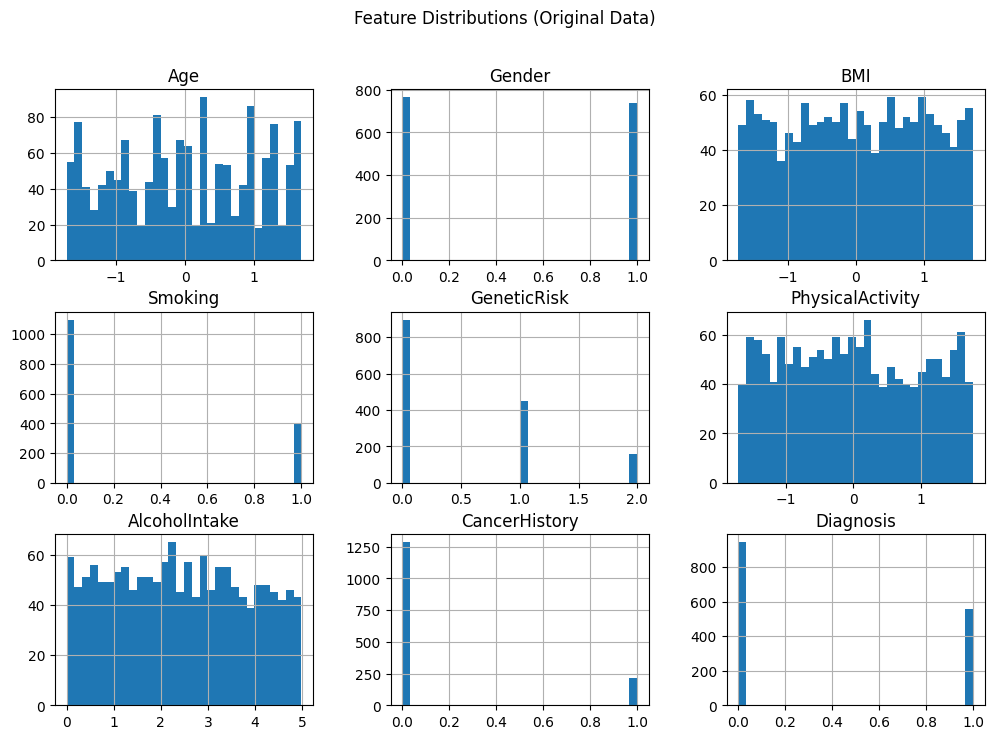

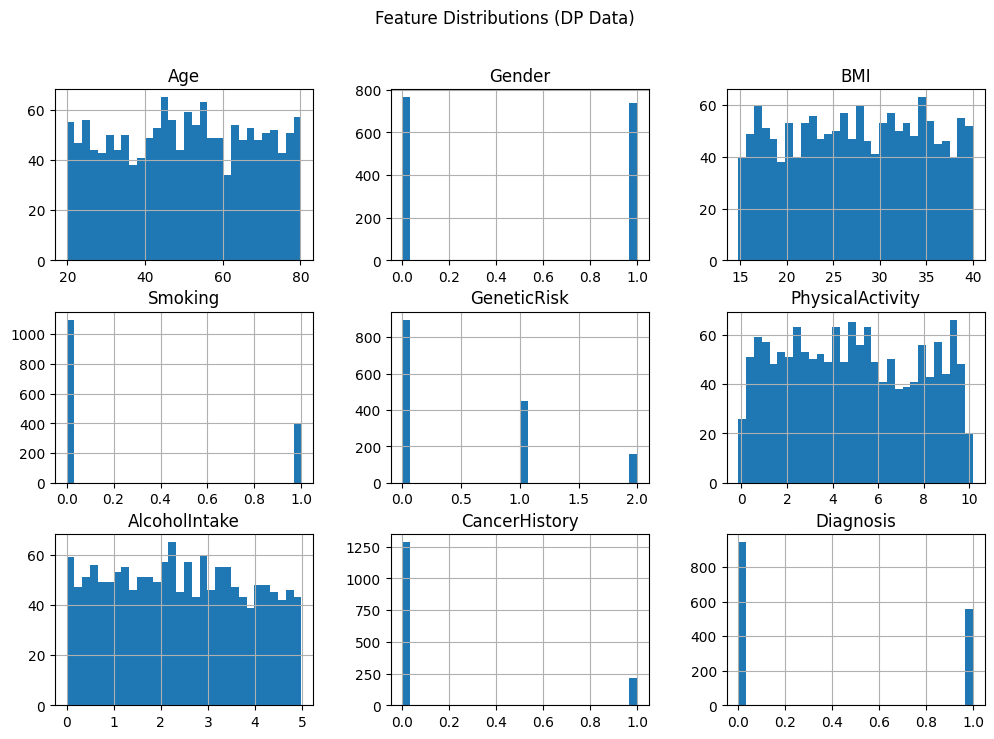

In [9]:
# Visualize distributions of numerical features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions (Original Data)")
plt.show()

df_dp.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions (DP Data)")
plt.show()

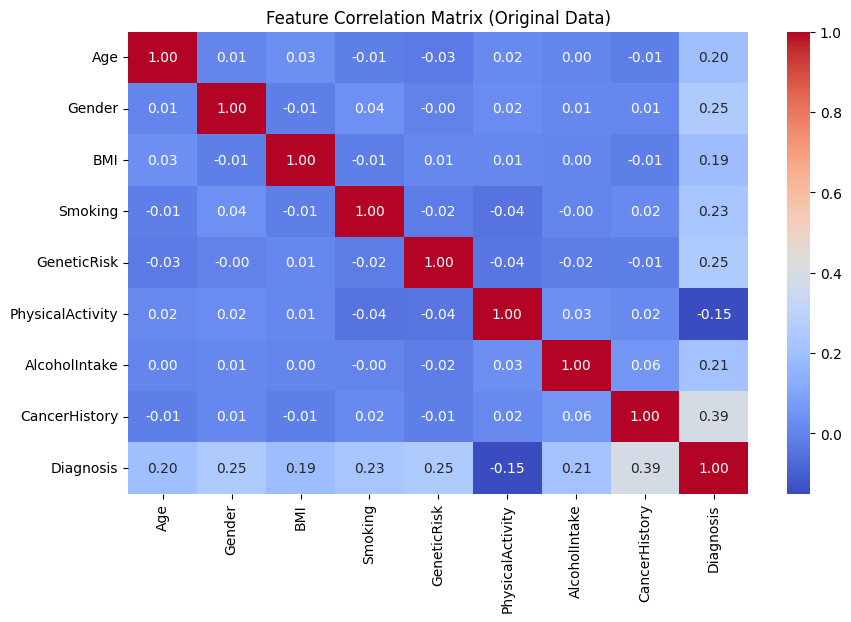

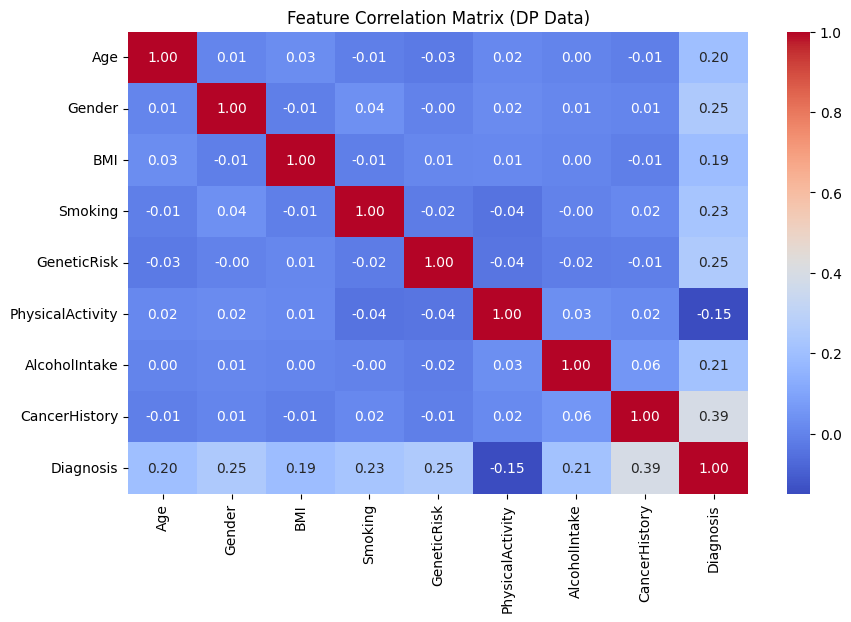

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix (Original Data)")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_dp.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix (DP Data)")
plt.show()

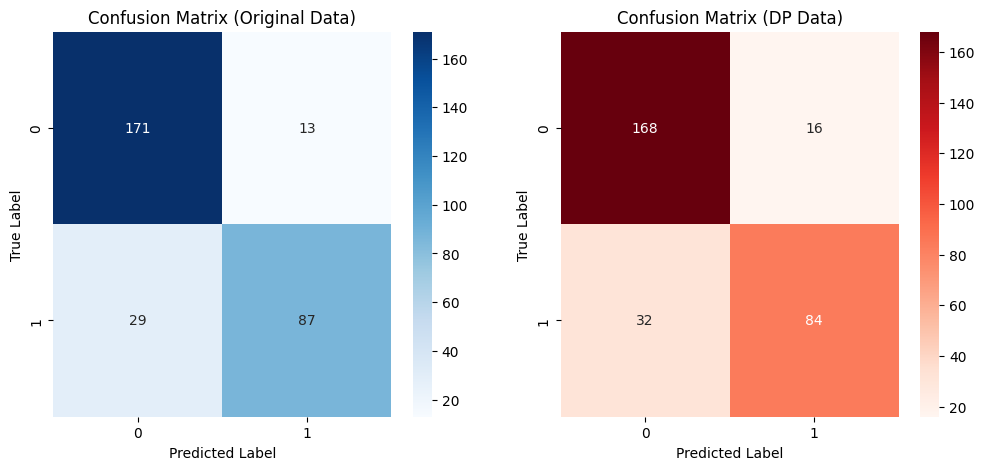

In [11]:
from sklearn.model_selection import train_test_split

# Define target variable
target_col = "Diagnosis"

# Split Data for Original Model
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split Data for DP Model
X_dp = df_dp.drop(columns=[target_col])
y_dp = df_dp[target_col]
X_train_dp, X_test_dp, y_train_dp, y_test_dp = train_test_split(X_dp, y_dp, test_size=0.2, random_state=42)

# Predict with both models
y_pred = log_reg.predict(X_test)
y_pred_dp = log_reg_dp.predict(X_test_dp)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Original Data)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_test_dp, y_pred_dp), annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Confusion Matrix (DP Data)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

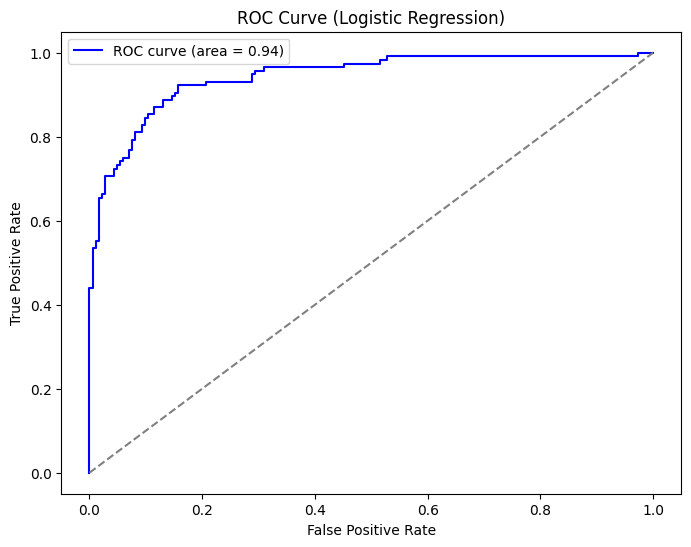

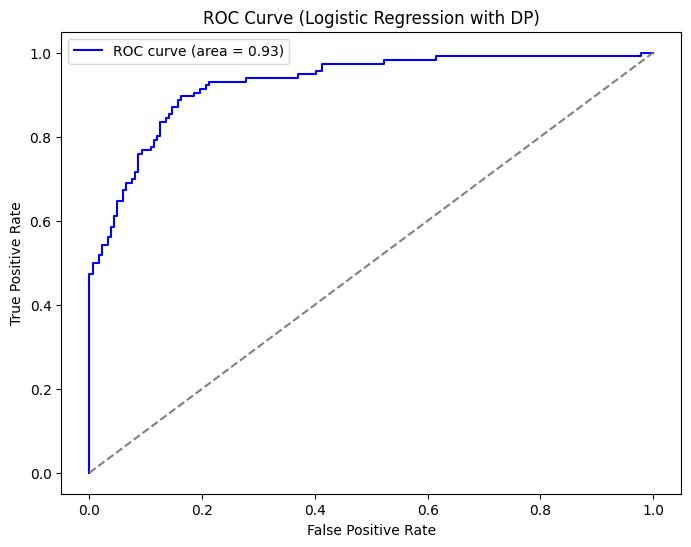

In [12]:
def plot_roc_curve(y_true, y_scores, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Get probabilities for ROC Curve
y_scores = log_reg.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_scores, "ROC Curve (Logistic Regression)")

y_scores_dp = log_reg_dp.predict_proba(X_test_dp)[:, 1]
plot_roc_curve(y_test_dp, y_scores_dp, "ROC Curve (Logistic Regression with DP)")

In [13]:
# Classification Report Comparison
print("📊 Logistic Regression Performance on Original Data:")
print(classification_report(y_test, y_pred))

print("\n📊 Logistic Regression Performance on DP Data:")
print(classification_report(y_test_dp, y_pred_dp))

📊 Logistic Regression Performance on Original Data:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       184
           1       0.87      0.75      0.81       116

    accuracy                           0.86       300
   macro avg       0.86      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300


📊 Logistic Regression Performance on DP Data:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       184
           1       0.84      0.72      0.78       116

    accuracy                           0.84       300
   macro avg       0.84      0.82      0.83       300
weighted avg       0.84      0.84      0.84       300

